In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
a = pd.read_csv('tt0_2.csv',sep=' ')

In [7]:
a = a.iloc[: ,0:-1 ]

In [8]:
a.to_csv('tt0_2.csv',sep = ' ',index = False)

In [15]:
a = a.iloc[ 1: , : ]

In [18]:
np.shape(a)

(19, 8)

In [30]:
b = a.iloc[ 0:8 : , : ]

In [31]:
b

,zbin1,zbin2,meanz,fout,CORIQRb,CORIQRs,err_CORIQRb,err_CORIQRs
1,0.00,0.30,0.2177,0.2054,0.0066,0.0238,0.0002,0.0005
2,0.15,0.45,0.3219,0.1843,0.0066,0.0258,0.0002,0.0003
3,0.30,0.60,0.4678,0.1317,0.0017,0.0220,0.0001,0.0002
4,0.45,0.75,0.5952,0.0718,0.0003,0.0158,0.0001,0.0001
5,0.60,0.90,0.7379,0.0295,0.0006,0.0150,0.0001,0.0001
6,0.75,1.05,0.8907,0.0337,0.0003,0.0156,0.0001,0.0001
7,0.90,1.20,1.0301,0.0524,0.0009,0.0163,0.0001,0.0001
8,1.05,1.35,1.1959,0.0811,0.0010,0.0222,0.0002,0.0002


In [313]:
np.median(b.CORIQRb)/np.median(b.err_CORIQRb)

9.5

In [310]:
np.median(b.CORIQRb/b.err_CORIQRb)

7.5

In [333]:
yy = np.median(b.CORIQRb/b.err_CORIQRb)
print(round(yy))

8.0


In [338]:
!pwd

/Users/am/Programs/Fisher/github


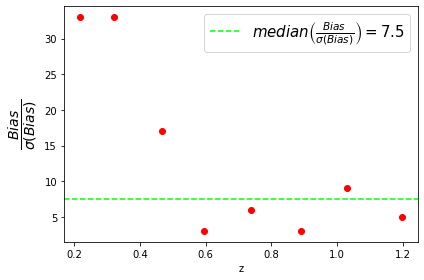

In [337]:
plt.plot(b.meanz,(b.CORIQRb/b.err_CORIQRb),'o',c='r')
plt.axhline(np.median(b.CORIQRb/b.err_CORIQRb),linestyle='--',c='lime',label=r'$median\left(\frac{Bias}{\sigma (Bias)}\right) = %s$'%yy)
plt.ylabel(r'$\frac{Bias}{\sigma (Bias)}$',size=20)
plt.xlabel('z')
plt.legend(prop={'size': 15})
plt.tight_layout()
#plt.savefig('Scale_factor.pdf',bbox_inches='tight')

In [33]:
#b.to_csv('melissa.csv',sep = ' ',index=False)

Text(0, 0.5, 'Mean Redshift (z)')

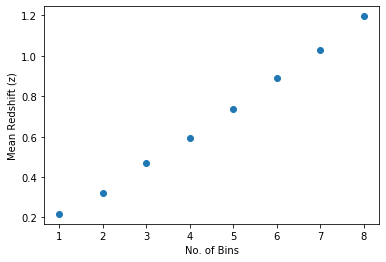

In [32]:
plt.plot(b.meanz, 'o')
plt.xlabel('No. of Bins');plt.ylabel('Mean Redshift (z)')

In [17]:
a.head(3)

,zbin1,zbin2,meanz,fout,CORIQRb,CORIQRs,err_CORIQRb,err_CORIQRs
1,0.00,0.30,0.2177,0.2054,0.0066,0.0238,0.0002,0.0005
2,0.15,0.45,0.3219,0.1843,0.0066,0.0258,0.0002,0.0003
3,0.30,0.60,0.4678,0.1317,0.0017,0.0220,0.0001,0.0002


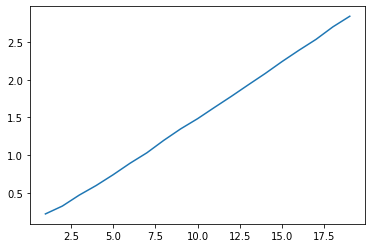

In [34]:
plt.plot(np.linspace(1,19,19), a.meanz )

In [41]:
c = b.iloc[: , [2,4]]

In [42]:
#c.to_csv('meliisa_reduced_bias.csv',sep = ' ')

In [43]:
c

,meanz,CORIQRb
1,0.2177,0.0066
2,0.3219,0.0066
3,0.4678,0.0017
4,0.5952,0.0003
5,0.7379,0.0006
6,0.8907,0.0003
7,1.0301,0.0009
8,1.1959,0.0010


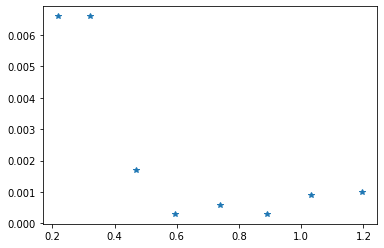

In [46]:
plt.plot(c.meanz, c.CORIQRb, '*')

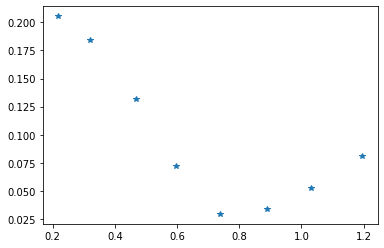

In [89]:
plt.plot(b.meanz, b.fout, '*')

In [47]:
from scipy.interpolate import interp1d

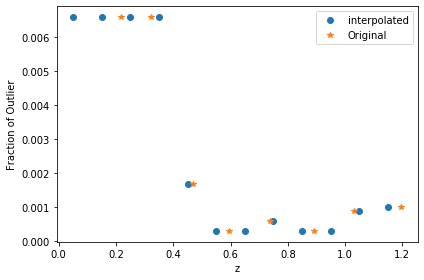

In [345]:
f2 = interp1d(c.meanz, c.CORIQRb, kind='nearest',fill_value="extrapolate") # nearest
#f2 = interp1d(b.meanz, b.err_CORIQRb, kind='nearest',fill_value="extrapolate") # cubic
f3 = interp1d(b.meanz, b.err_CORIQRb, kind='nearest',fill_value="extrapolate") # cubic
#f2 = interp1d(b.meanz, b.fout, kind='cubic',fill_value="extrapolate") # cubic

xnew = np.linspace(0.05,1.15,12, endpoint=True)
#np.linspace(0.05,1.15,12)

plt.plot(xnew,f2(xnew),'o', label = 'interpolated')
plt.plot(c.meanz, c.CORIQRb, '*', label = 'Original')
#plt.plot(b.meanz, b.err_CORIQRb, '*', label = 'Original')
#plt.plot(b.meanz, b.fout, '*', label = 'Original')
plt.xlabel('z')
plt.ylabel('Robust bias(error) "CORIQRb" ' )
plt.ylabel('Fraction of Outlier')
plt.legend()
plt.tight_layout()
#plt.savefig('Outlier_f.pdf',bbox_inches='tight')

In [61]:
xnew

array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05,
       1.15])

In [95]:
f2(xnew)

array([0.20912123, 0.21147878, 0.20036467, 0.17622811, 0.13951835,
       0.09257723, 0.05048396, 0.02818498, 0.02944854, 0.04100926,
       0.05548971, 0.07250039])

In [346]:
f3(xnew)

array([0.0002, 0.0002, 0.0002, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001, 0.0001, 0.0002])

In [350]:
y4 = np.median(f2(xnew)/f3(xnew))

In [352]:
xnew

array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05,
       1.15])

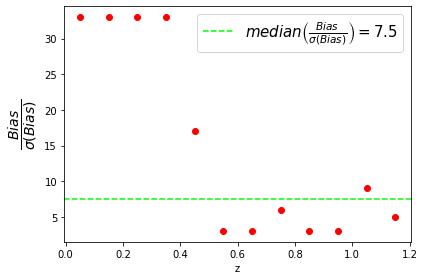

In [351]:
plt.plot(xnew,f2(xnew)/f3(xnew),'o',c='r')
plt.axhline(np.median(f2(xnew)/f3(xnew)),linestyle='--',c='lime',label=r'$median\left(\frac{Bias}{\sigma (Bias)}\right) = %s$'%y4)
plt.ylabel(r'$\frac{Bias}{\sigma (Bias)}$',size=20)
plt.xlabel('z')
plt.legend(prop={'size': 15})
plt.tight_layout()
#plt.savefig('Scale_factorII.pdf',bbox_inches='tight')

In [96]:
inter = np.array(list(zip(xnew,f2(xnew))))

In [97]:
d = pd.DataFrame(inter, columns=['z','bias'])

In [98]:
#d.to_csv('interpolated_error.csv',sep = ' ',index = False)
#d.to_csv('interpolated_fout.csv',sep = ' ',index = False)

In [176]:
d

,z,bias
0,0.05,0.209121
1,0.15,0.211479
2,0.25,0.200365
3,0.35,0.176228
4,0.45,0.139518
5,0.55,0.092577
6,0.65,0.050484
7,0.75,0.028185
8,0.85,0.029449
9,0.95,0.041009


### Estimating the z' for outliers from the figure 5a, by estimting a median for each z slice

In [ ]:
from random import randint,  uniform

In [168]:
x00 = 2.51
# 0.15
# For bin z = [0.05-0.15]
# roughly 15% points on the left side and ~ 75% on right side
x_left = [uniform(0.25, 0.65) for p in range(0, 15)]
x_right = [uniform(2.0, 3.0) for p in range(0, 70)]
x = np.concatenate([x_left,x_right])
#print(np.shape(x))
x1 = np.median(x)
print('Median z for  z[0.05-0.15] = ',x1)

# 0.25
# For bin z = [0.15-0.25]

x_left = [uniform(0.25, 0.65) for p in range(0, 115)]
x_right = [uniform(2.1, 3.0) for p in range(0, 100)]
x = np.concatenate([x_left,x_right])
#print(np.shape(x))
x2 = np.median(x)
print('Median z for  z[0.15-0.25] = ',x2)

# 0.35
# For bin z = [0.25-0.35]

x_left = [uniform(0.33, 0.6) for p in range(0, 115)]
x_right = [uniform(2.3, 3.0) for p in range(0, 100)]
x = np.concatenate([x_left,x_right])
#print(np.shape(x))
x3 = np.median(x)
print('Median z for  z[0.25-0.35] = ',x3)

# 0.45
# For bin z = [0.35-0.45]

x_left = [uniform(0.3, 0.65) for p in range(0, 500)]
x_right = [uniform(2.3, 3.0) for p in range(0, 100)]
x = np.concatenate([x_left,x_right])
#print(np.shape(x))
x4 = np.median(x)
print('Median z for  z[0.35-0.45] = ',x4)

# 0.55
# For bin z = [0.45-0.55]

x_left = [uniform(0.3, 0.98) for p in range(0, 1000)]
x_right = [uniform(2.25, 2.98) for p in range(0, 70)]
x = np.concatenate([x_left,x_right])
#print(np.shape(x))
x5 = np.median(x)
print('Median z for  z[0.45-0.55] = ',x5)

# 0.65
# For bin z = [0.55-0.65]
x_left = [uniform(0.4, 0.95) for p in range(0, 1000)]
x_right = [uniform(1.6, 2.99) for p in range(0, 30)]
x = np.concatenate([x_left,x_right])
#print(np.shape(x))
x6 = np.median(x)
print('Median z for  z[0545-0.65] = ',x6)

# 0.75
# For bin z = [0.65-0.75]
x_left = [uniform(0.5, 0.97) for p in range(0, 1000)]
x_right = [uniform(2.0, 2.99) for p in range(0, 30)]
x = np.concatenate([x_left,x_right])
#print(np.shape(x))
x7 = np.median(x)
print('Median z for  z[0.65-0.75] = ',x7)

# 0.85
# For bin z = [0.75-0.85]

x_left = [uniform(0.3, 1.3) for p in range(0, 1000)]
x_right = [uniform(1.3, 2.99) for p in range(0, 30)]
x = np.concatenate([x_left,x_right])
#print(np.shape(x))
x8 = np.median(x)
print('Median z for  z[0.75-0.85] = ',x8)

# 0.95
# For bin z = [0.85-0.95]

x_left = [uniform(0.6, 1.7) for p in range(0, 800)]
x_right = [uniform(1.7, 2.99) for p in range(0, 15)]
x = np.concatenate([x_left,x_right])
#print(np.shape(x))
x9 = np.median(x)
print('Median z for  z[0.85-0.95] = ',x9)

# 1.05
# For bin z = [0.95-1.05]

x_left = [uniform(0.75, 2.0) for p in range(0, 900)]
x_right = [uniform(2.0, 2.5) for p in range(0, 5)]
x = np.concatenate([x_left,x_right])
#print(np.shape(x))
x10 = np.median(x)
print('Median z for  z[0.95-1.05] = ',x10)

# 1.15
# For bin z = [1.05-1.15]

x_left = [uniform(0.9, 2.25) for p in range(0, 900)]
x_right = [uniform(2.25, 2.35) for p in range(0, 2)]
x = np.concatenate([x_left,x_right])
#print(np.shape(x))
x11 = np.median(x)
print('Median z for  z[1.05-1.15] = ',x11)

Median z for  z[0.05-0.15] =  2.3261989393677087
Median z for  z[0.15-0.25] =  0.6315262491486663
Median z for  z[0.25-0.35] =  0.5943978007210633
Median z for  z[0.35-0.45] =  0.5220605736215939
Median z for  z[0.45-0.55] =  0.661142910528888
Median z for  z[0545-0.65] =  0.6899686369245691
Median z for  z[0.65-0.75] =  0.7431625684235628
Median z for  z[0.75-0.85] =  0.8253339770308706
Median z for  z[0.85-0.95] =  1.1669048749497501
Median z for  z[0.95-1.05] =  1.379700650878486
Median z for  z[1.05-1.15] =  1.5603061948677124


In [169]:
x_t = [x00,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11]

In [170]:
x_t

[2.51,
 2.3261989393677087,
 0.6315262491486663,
 0.5943978007210633,
 0.5220605736215939,
 0.661142910528888,
 0.6899686369245691,
 0.7431625684235628,
 0.8253339770308706,
 1.1669048749497501,
 1.379700650878486,
 1.5603061948677124]

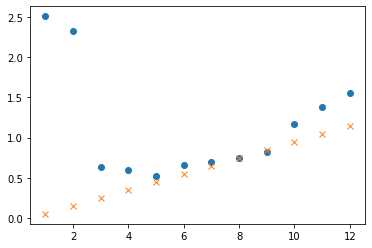

In [174]:
plt.plot(np.linspace(1,12,12),x_t,'o')
plt.plot(np.linspace(1,12,12),np.linspace(0.05,1.15,12),'x')

In [186]:
catash = np.array(list(zip(np.linspace(0.05,1.15,12),x_t,d.bias)))

In [189]:
catash

,z_true,z_photo,F
0,0.05,2.510000,0.209121
1,0.15,2.326199,0.211479
2,0.25,0.631526,0.200365
3,0.35,0.594398,0.176228
4,0.45,0.522061,0.139518
5,0.55,0.661143,0.092577
6,0.65,0.689969,0.050484
7,0.75,0.743163,0.028185
8,0.85,0.825334,0.029449
9,0.95,1.166905,0.041009


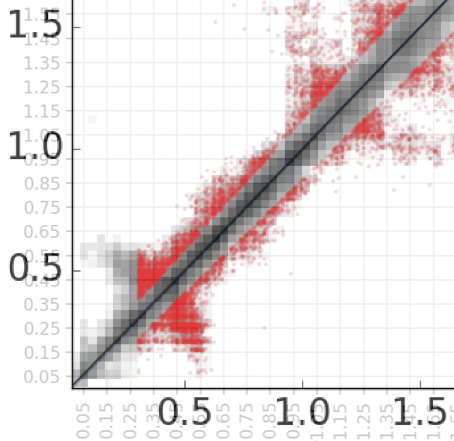

In [282]:
from IPython.display import Image
from IPython.core.display import HTML 
Image("Catastrophic/superposed2.jpg")

In [303]:
catash.z_photo[0] = 0.09 # bin 0.05 [0 - 0.1] ??? What to do here
catash.z_photo[1] = 0.40 # 0.15
catash.z_photo[2] = 0.45 # 0.25
catash.z_photo[3] = 0.48 # 0.35
catash.z_photo[4] = 0.38 # 0.45
catash.z_photo[5] = 0.50 # 0.55
catash.z_photo[6] = 0.60 # 0.65
catash.z_photo[7] = 0.65 # 0.75
catash.z_photo[8] = 0.95 # 0.85
catash.z_photo[9] = 1.10 # 0.95
catash.z_photo[10]= 1.21 # 1.05, 
catash.z_photo[11]= 1.25 # 1.15

In [304]:
catash.z_photo

0     0.09
1     0.40
2     0.45
3     0.48
4     0.38
5     0.50
6     0.60
7     0.65
8     0.95
9     1.10
10    1.21
11    1.25
Name: z_photo, dtype: float64

In [305]:
catash = pd.DataFrame(catash,columns=['z_true','z_photo','F'])
catash.to_csv('Catastrophic/f2.csv',index = False)

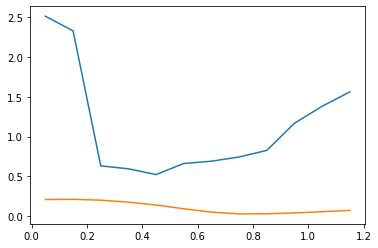

In [188]:
plt.plot(catash.z_true,catash.z_photo)
plt.plot(catash.z_true,catash.F)

In [306]:
catash

,z_true,z_photo,F
0,0.05,0.09,0.209121
1,0.15,0.40,0.211479
2,0.25,0.45,0.200365
3,0.35,0.48,0.176228
4,0.45,0.38,0.139518
5,0.55,0.50,0.092577
6,0.65,0.60,0.050484
7,0.75,0.65,0.028185
8,0.85,0.95,0.029449
9,0.95,1.10,0.041009
